In [1]:
# Look for *.tif files in all subfolders.
from os import walk
from os.path import join
import fnmatch
folderName = '/home/jiongyi/Documents/DNA repair factor colocalization shit/20180902/slides from 20180808/10 gammas/Mdc1 1hr postIR'
tifFilePaths = []
searchString = '*.tif'
for (dirPath, dirNames, fileNames) in walk(folderName):
    for fileName in fileNames:
        if fnmatch.fnmatch(fileName, searchString):
            tifFilePaths.append(join(dirPath, fileName))

In [2]:
from skimage.io import imread
from skimage import img_as_float
from numpy import mean
from skimage.exposure import equalize_adapthist
# Load stack.
currentStack = img_as_float(imread(tifFilePaths[30]))
# Restack.
noChannels, noSlices, noRows, noColumns = currentStack.shape
zLambda1Stack= currentStack[0, :, :, :]
zLambda2Stack = currentStack[1, :, :, :]
zLambda3Stack = currentStack[2, :, :, :]

In [3]:
# Find focused image.
from numpy import zeros, std, where
varianceArr = zeros(noSlices)
for i in range(noSlices):
    varianceArr[i] = std(zLambda2Stack[i, :, :].flatten())
idxFocused = where(varianceArr == max(varianceArr))[0][0]
lambda1Img = zLambda1Stack[idxFocused, :, :]
lambda2Img = zLambda2Stack[idxFocused, :, :]
lambda3Img = zLambda3Stack[idxFocused, :, :]

In [4]:
# Binarize based on third channel.
from skimage.filters import threshold_otsu
adapthistImg = equalize_adapthist(lambda3Img, clip_limit = 0.0005)
otsuThreshold = threshold_otsu(adapthistImg)
isNucleiImg = adapthistImg > otsuThreshold

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [5]:
# Find blobs.
from skimage.morphology import white_tophat, disk
from skimage.feature import blob_log
eqLambda1Img = equalize_adapthist(lambda1Img, clip_limit = 0.003) * isNucleiImg
eqLambda1Img = white_tophat(eqLambda1Img, disk(2))
lambda1Blobs = blob_log(eqLambda1Img, min_sigma = 2, max_sigma = 5, threshold = 0.05)
eqLambda2Img = equalize_adapthist(lambda2Img, clip_limit = 0.003) * isNucleiImg
eqLambda2Img = white_tophat(eqLambda2Img, disk(2))
lambda2Blobs = blob_log(eqLambda2Img, min_sigma = 2, max_sigma = 5, threshold = 0.05)

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


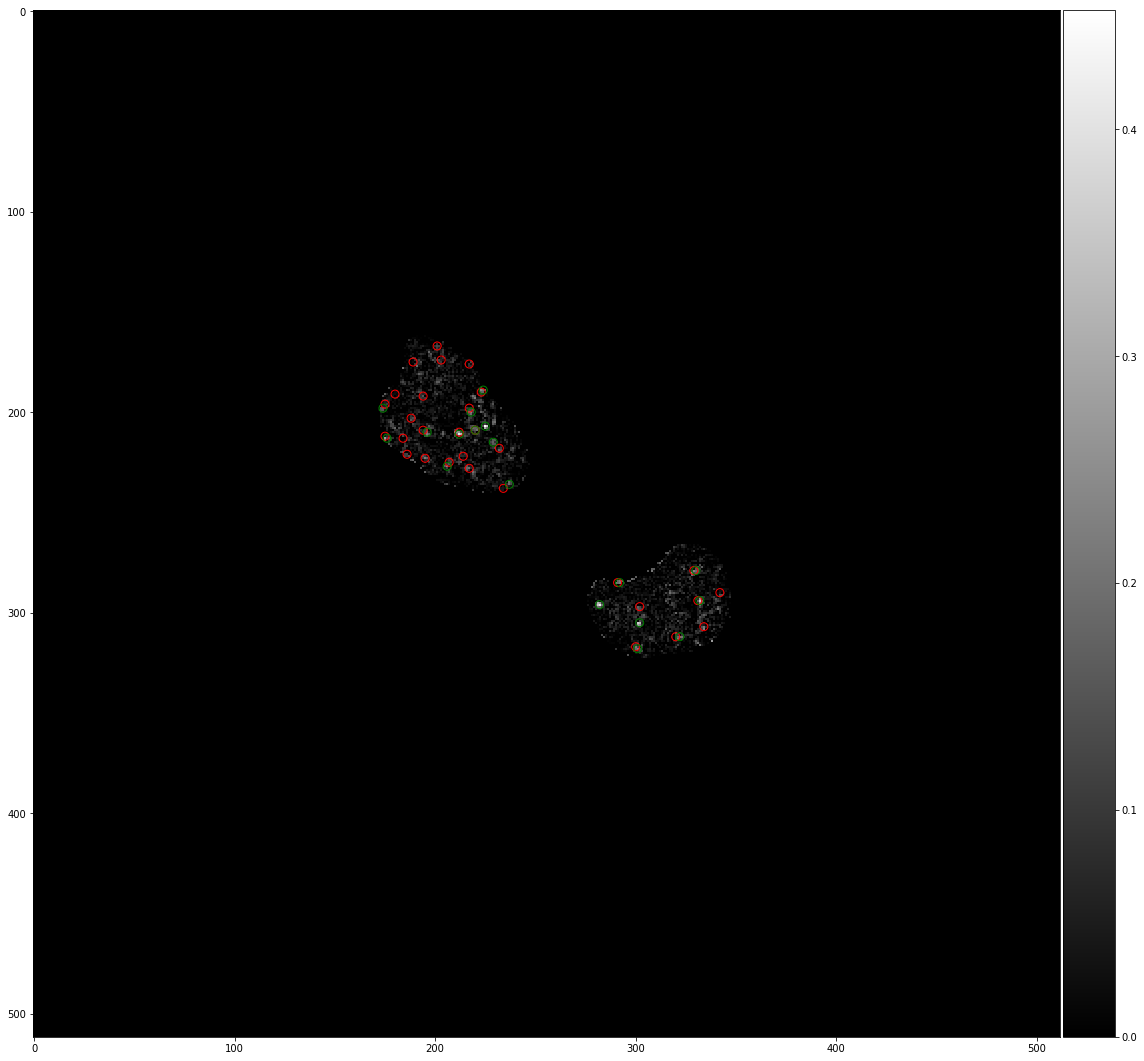

In [6]:
from matplotlib.pyplot import plot, subplots, Circle
from matplotlib.pyplot import cm
from skimage.io import imshow
hFigure, hAxes = subplots(figsize = (16, 16))
imshow(eqLambda2Img, cmap = cm.gray)
for blob in lambda1Blobs:
    y, x, r = blob
    c = Circle((x, y), r, color = 'r', linewidth = 1, fill = False)
    hAxes.add_patch(c)
for blob in lambda2Blobs:
    y, x, r = blob
    c = Circle((x, y), r, color = 'g', linewidth = 1, fill = False)
    hAxes.add_patch(c)

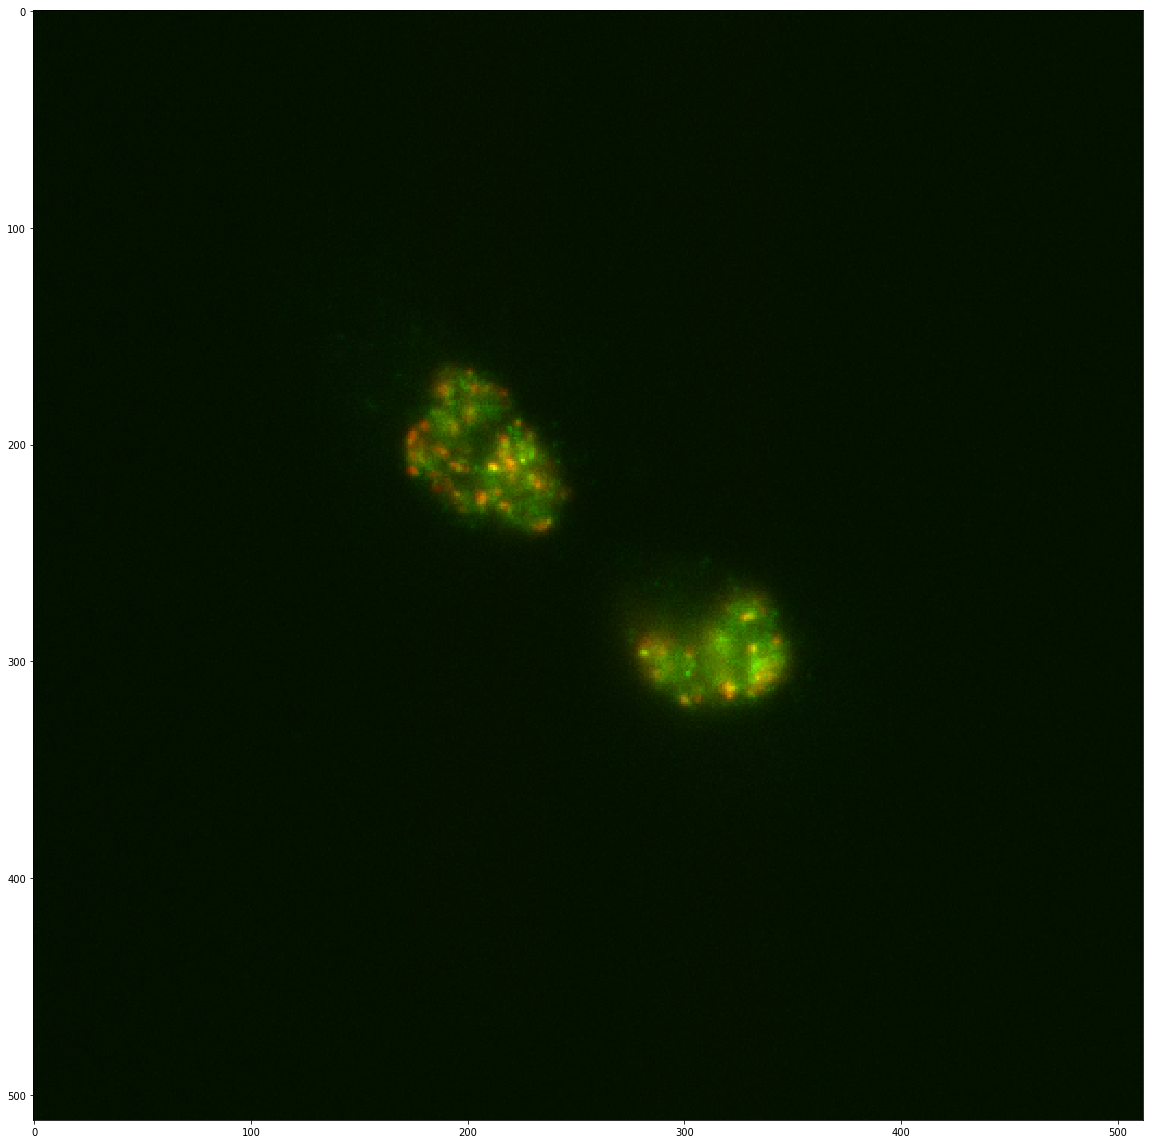

In [7]:
from numpy import stack
from skimage import img_as_uint
subplots(figsize = (16, 16))
rgbStack = stack((lambda1Img / max(lambda1Img.flatten()), lambda2Img / max(lambda2Img.flatten()), zeros((noRows, noColumns))), axis = -1)
imshow(rgbStack)